In [35]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

from kmodes.kprototypes import KPrototypes
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from plotly import graph_objects as go
import prince

In [36]:
dtafile = 'love_study_features_optimization_categorical.csv'

df = pd.read_csv(dtafile)
df.head()


,married / was married,couple,any relation,respondent gender,couple gender,interracial couple,respondent age,partner age,education gap,couple salary gap,couple political stability,meeting interface,try app service,relation duration [year],relation quality
0,no,no,yes,Male,gay male couple,no,[30 -40],[20 -30],2.0,I earned more,2.0,meet through internet,no,0.25,NaN
1,yes,yes,NaN,Female,hetero couple,no,[50 -60],[50 -60],0.0,[Partner Name] earned more,5.0,meet through work,NaN,21.92,Excellent
2,yes,yes,NaN,Male,hetero couple,no,[40 -50],[40 -50],3.0,I earned more,6.0,meet through internet,NaN,11.08,Good
3,no,no,yes,Female,lesbian couple,no,[20 -30],[20 -30],0.0,I earned more,3.0,meet through internet,NaN,0.17,NaN
4,yes,yes,NaN,Female,hetero couple,no,[50 -60],[50 -60],0.0,[Partner Name] earned more,6.0,meet in neighborhood,NaN,33.75,Excellent


In [37]:
df["try app service"].value_counts()

no     227
yes     98
Name: try app service, dtype: int64

# Analysis on people using an App

### Dataset prep

In [38]:
use_app = df["try app service"]=="yes"

df_app = df[use_app]
df_app

,married / was married,couple,any relation,respondent gender,couple gender,interracial couple,respondent age,partner age,education gap,couple salary gap,couple political stability,meeting interface,try app service,relation duration [year],relation quality
12,no,no,yes,Male,hetero couple,no,[20 -30],[20 -30],0.0,[Partner Name] earned more,5.0,meet through internet,yes,0.08,NaN
40,yes,yes,NaN,Male,hetero couple,no,[40 -50],[50 -60],4.0,[Partner Name] earned more,6.0,meet through work,yes,29.42,Excellent
43,NaN,yes,NaN,Male,hetero couple,no,[30 -40],[30 -40],0.0,We earned about the same amount,4.0,meet through internet,yes,0.08,Excellent
94,yes,yes,NaN,Male,hetero couple,no,[40 -50],[40 -50],0.0,I earned more,2.0,meet through friends,yes,21.58,Fair
114,yes,yes,NaN,Male,hetero couple,yes,[40 -50],[40 -50],0.0,I earned more,5.0,NaN,yes,41.50,Excellent
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3470,no,no,yes,Female,hetero couple,no,[20 -30],[20 -30],1.0,We earned about the same amount,5.0,NaN,yes,0.50,NaN
3476,yes,yes,NaN,Male,gay male couple,no,[30 -40],[30 -40],0.0,[Partner Name] earned more,5.0,meet through internet,yes,6.42,Excellent
3492,no,no,yes,Male,gay male couple,yes,[50 -60],[30 -40],0.0,I earned more,3.0,meet through internet,yes,0.25,NaN
3493,no,no,yes,Male,gay male couple,no,[30 -40],[20 -30],0.0,We earned about the same amount,3.0,meet through internet,yes,0.50,NaN


In [39]:
df_app = df_app.dropna(axis='columns')

In [40]:
df_app = df_app.drop(['try app service'], axis=1)

### MCA Analysis

In [41]:
import prince

mca_cols = df_app.columns

# instantiate MCA class
mca = prince.MCA(n_components = 2)

# get principal components
mca = mca.fit(df_app[mca_cols])

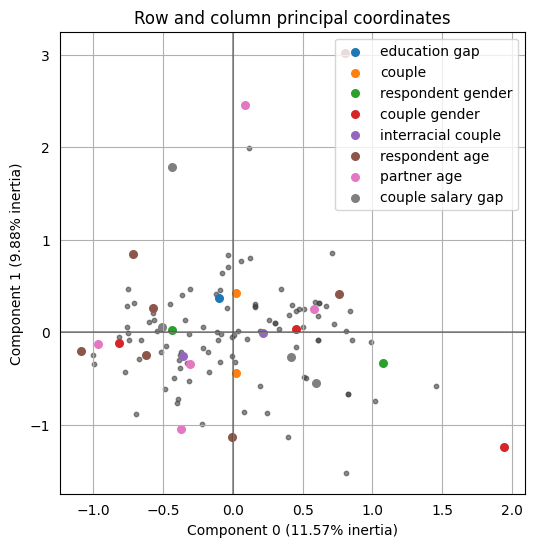

In [42]:
ax = mca.plot_coordinates(df_app[mca_cols])

### K-MODE Analysis

In [45]:
from kmodes.kmodes import KModes
df_mca = mca.row_coordinates(df_app)

cost = []
for num_clusters in list(range(1,10)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 10, verbose=1)
    kmode.fit_predict(df_mca)
    cost.append(kmode.cost_)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 192.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 188.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 184.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 180.0
Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 

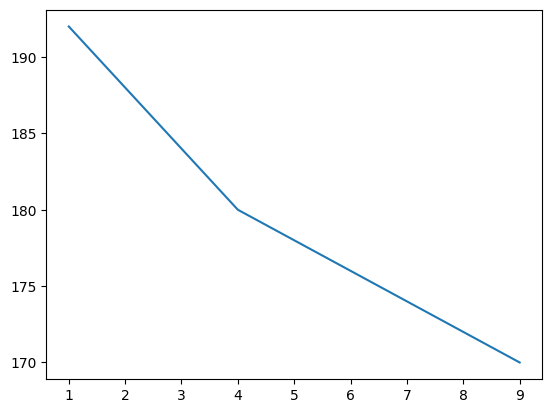

In [46]:
y = np.array([i for i in range(1,10,1)])
plt.plot(y,cost)

In [48]:
km_cao = KModes(n_clusters=4, init = "Cao", n_init = 10, verbose=1)
fitClusters_cao = km_cao.fit_predict(df_app)

Initialization method and algorithm are deterministic. Setting n_init to 1.
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 11, cost: 273.0
Run 1, iteration: 2/100, moves: 4, cost: 273.0


In [65]:
df_app2 = df_app.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([df_app2, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
cluster_0 = combinedDf[combinedDf['cluster_predicted'] == 0]
cluster_1 = combinedDf[combinedDf['cluster_predicted'] == 1]
cluster_2 = combinedDf[combinedDf['cluster_predicted'] == 2]
cluster_3 = combinedDf[combinedDf['cluster_predicted'] == 3]

In [68]:
combinedDf2 = pd.DataFrame()
combinedDf2['data_index'] = combinedDf.index.values
combinedDf2['cluster_predicted'] = km_cao.labels_
combinedDf2[combinedDf2.cluster_predicted == 1]

,data_index,cluster_predicted
8,8,1
13,13,1
17,17,1
22,22,1
52,52,1
53,53,1
55,55,1
56,56,1
60,60,1
63,63,1


In [51]:
combinedDf

,couple,respondent gender,couple gender,interracial couple,respondent age,partner age,education gap,couple salary gap,cluster_predicted
0,no,Male,hetero couple,no,[20 -30],[20 -30],0.0,[Partner Name] earned more,0
1,yes,Male,hetero couple,no,[40 -50],[50 -60],4.0,[Partner Name] earned more,0
2,yes,Male,hetero couple,no,[30 -40],[30 -40],0.0,We earned about the same amount,0
3,yes,Male,hetero couple,no,[40 -50],[40 -50],0.0,I earned more,0
4,yes,Male,hetero couple,yes,[40 -50],[40 -50],0.0,I earned more,0
...,...,...,...,...,...,...,...,...,...
93,no,Female,hetero couple,no,[20 -30],[20 -30],1.0,We earned about the same amount,0
94,yes,Male,gay male couple,no,[30 -40],[30 -40],0.0,[Partner Name] earned more,0
95,no,Male,gay male couple,yes,[50 -60],[30 -40],0.0,I earned more,1
96,no,Male,gay male couple,no,[30 -40],[20 -30],0.0,We earned about the same amount,2


In [53]:
combinedDfH = combinedDf.apply(lambda x: pd.factorize(x)[0])
X = combinedDfH.drop("cluster_predicted", axis=1)
y = combinedDfH["cluster_predicted"]

0    0
1    0
2    0
3    0
4    0
Name: cluster_predicted, dtype: int64

In [54]:
from lightgbm import LGBMClassifier
import shap
from sklearn.model_selection import cross_val_score

clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, X, y, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
[LightGBM] [Warning] Unknown parameter: colsample_by_tree
CV F1 score for K-Prototypes clusters is 0.8169394319131161


[LightGBM] [Warning] Unknown parameter: colsample_by_tree


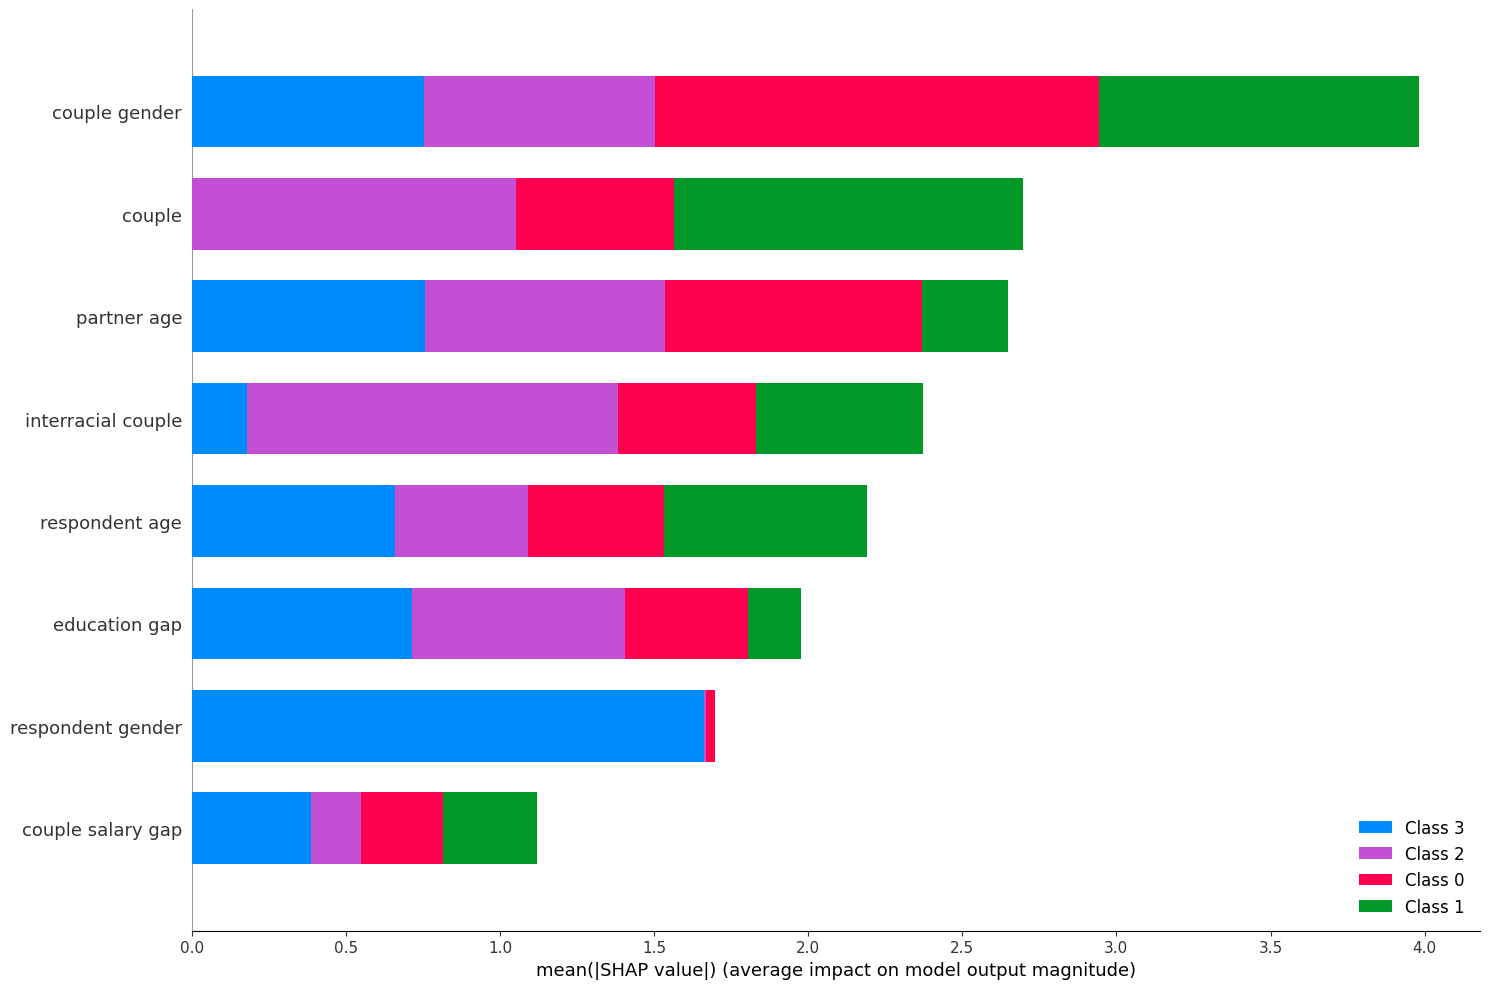

In [55]:
clf_kp.fit(X, y)
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(X)
shap.summary_plot(shap_values_kp, X, plot_type="bar", plot_size=(15, 10))

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)


rf=RandomForestClassifier()

rf.fit(X_train,y_train)
print(accuracy_score(y_test, rf.predict(X_test)))
print(rf.feature_importances_)

0.85
[0.07288895 0.08008539 0.24898261 0.11482617 0.1133576  0.13439033
 0.14398446 0.09148449]


In [59]:
X.head()

,couple,respondent gender,couple gender,interracial couple,respondent age,partner age,education gap,couple salary gap
0,0,0,0,0,0,0,0,0
1,1,0,0,0,1,1,1,0
2,1,0,0,0,2,2,0,1
3,1,0,0,0,1,3,0,2
4,1,0,0,1,1,3,0,2
